In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_excel("A2_data.xlsx")

# Hierarchical clustering

**1. Perform k-means clustering (with k=3).**

In [3]:
# K-mean clustering with k = 3
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
from sklearn.manifold import TSNE

In [5]:
# t-SNE transformation
X_embedded = TSNE(n_components=2,random_state=0).fit_transform(X)

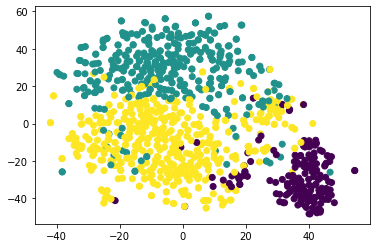

In [6]:
# Visualization of the clustering plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=y_kmeans)
plt.show()

**2. Perform hierarchical clustering on A2 data.csv**

In [7]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

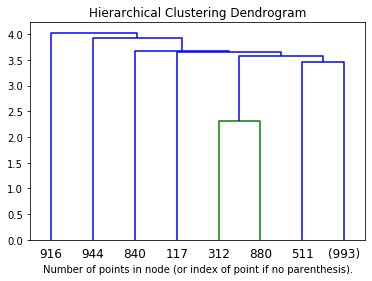

In [8]:
# (i) single-link distance dendrogram
model_1 = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None,linkage='single',affinity='euclidean')
model_1 = model_1.fit(X)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model_1, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [9]:
# Extract 3-cluster solution from the dengrogram with single-link distance
model_1_3cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
model_1_3cluster = model_1_3cluster.fit_predict(X)
model_1_3cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5, 1.0, 'single-link distance clustering plot')

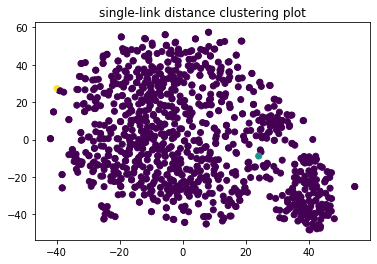

In [10]:
# (i) single-link distance clustering plot
model_1_s = AgglomerativeClustering(n_clusters=3, linkage="single", affinity="euclidean")
model_1_s_prediction = model_1_s.fit_predict(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=model_1_s_prediction)
plt.title("single-link distance clustering plot")

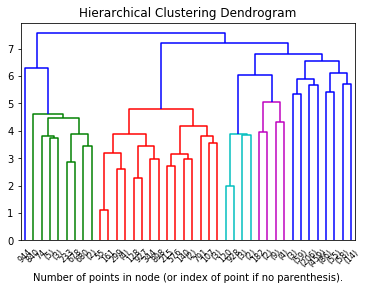

In [11]:
# (ii) complete-link distance dendrogram
model_2 = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None,linkage='complete',affinity='euclidean')
model_2 = model_2.fit(X)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model_2, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [12]:
# Extract 3-cluster solution from the dengrogram with complete-link distance
model_2_3cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
model_2_3cluster = model_2_3cluster.fit_predict(X)
model_2_3cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

Text(0.5, 1.0, 'complete-link distance clustering plot')

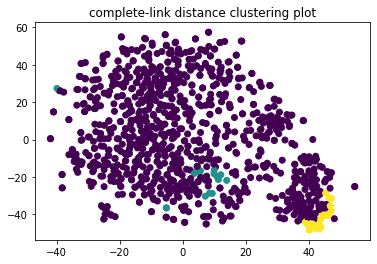

In [13]:
# (ii) complete-link distance clustering plot
model_2_c = AgglomerativeClustering(n_clusters=3, linkage="complete", affinity="euclidean")
model_2_c_prediction = model_2_c.fit_predict(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=model_2_c_prediction)
plt.title("complete-link distance clustering plot")

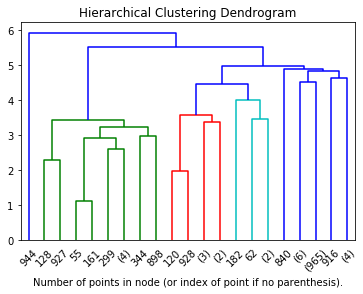

In [14]:
# (iii) group average distance dendrogram
model_3 = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None,linkage='average',affinity='euclidean')
model_3 = model_3.fit(X)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model_3, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
# Extract 3-cluster solution from the dengrogram with group average distance
model_3_3cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
model_3_3cluster = model_3_3cluster.fit_predict(X)
model_3_3cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

Text(0.5, 1.0, 'group average distance clustering plot')

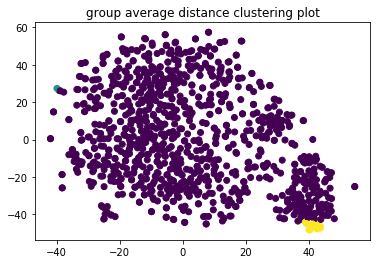

In [16]:
# (ii) group average distance clustering plot
model_3_avg = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="euclidean")
model_3_avg_prediction = model_3_avg.fit_predict(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=model_3_avg_prediction)
plt.title("group average distance clustering plot")

# Network Commnities

**1. Use NetworkX to construct and show the following undirected unweighted graph.**

In [17]:
import networkx as nx

In [18]:
G = nx.Graph()

In [19]:
G.add_nodes_from(list(range(1,35)))

In [20]:
G.add_edges_from([(1,2),(1,22),(1,18),(1,8),(1,4),(1,13),(1,6),(1,7),(1,11),(1,5),(1,12),(1,14),(1,9),
                  (1,32),(1,3),(1,20),(2,20),(2,18),(2,8),(2,4),(2,1),(2,3),(2,31),(3,1),(3,4),(3,8),(3,2),
                 (3,10),(3,28),(3,33),(3,29),(3,9),(3,14),(4,13),(4,8),(4,2),(4,3),(4,1),(4,14),(5,1),
                 (5,7),(5,11),(6,1),(6,7),(6,11),(6,17),(7,6),(7,1),(7,5),(7,17),(8,2),(8,3),(8,1),(8,4),
                 (9,1),(9,3),(9,31),(9,34),(9,33),(10,3),(10,34),(11,6),(11,1),(11,5),(12,1),(13,1),(13,4),
                 (14,3),(14,2),(14,1),(14,4),(15,34),(15,33),(16,34),(16,33),(17,6),(17,7),(18,1),(18,2),
                 (19,34),(19,33),(20,2),(20,1),(20,34),(21,33),(21,34),(22,2),(22,1),(23,33),(23,34),(24,26),
                 (24,30),(24,33),(24,34),(24,28),(25,26),(25,32),(25,28),(26,25),(26,32),(26,24),(27,30),
                 (27,34),(28,25),(28,24),(28,34),(28,33),(28,3),(29,33),(29,34),(29,32),(29,3),(30,27),(30,33),
                 (30,24),(30,34),(31,2),(31,9),(31,33),(31,34),(32,1),(32,29),(32,34),(32,25),(32,26),(32,33),
                 (33,9),(33,29),(33,23),(33,21),(33,19),(33,16),(33,15),(33,30),(33,24),(33,34),(33,28),(33,31),
                 (33,32),(33,3),(34,24),(34,28),(34,10),(34,20),(34,31),(34,32),(34,14),(34,9),(34,29),(34,23),
                 (34,21),(34,19),(34,16),(34,15),(34,27),(34,20)],weight=1) 
print(G.edges)

[(1, 2), (1, 22), (1, 18), (1, 8), (1, 4), (1, 13), (1, 6), (1, 7), (1, 11), (1, 5), (1, 12), (1, 14), (1, 9), (1, 32), (1, 3), (1, 20), (2, 20), (2, 18), (2, 8), (2, 4), (2, 3), (2, 31), (2, 14), (2, 22), (3, 4), (3, 8), (3, 10), (3, 28), (3, 33), (3, 29), (3, 9), (3, 14), (4, 13), (4, 8), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 34), (9, 33), (10, 34), (14, 34), (15, 34), (15, 33), (16, 34), (16, 33), (19, 34), (19, 33), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 30), (24, 33), (24, 34), (24, 28), (25, 26), (25, 32), (25, 28), (26, 32), (27, 30), (27, 34), (28, 34), (28, 33), (29, 33), (29, 34), (29, 32), (30, 33), (30, 34), (31, 33), (31, 34), (32, 34), (32, 33), (33, 34)]


In [21]:
print(G.number_of_nodes())  # the number of nodes
print(G.number_of_edges())  # the number of edges

34
80


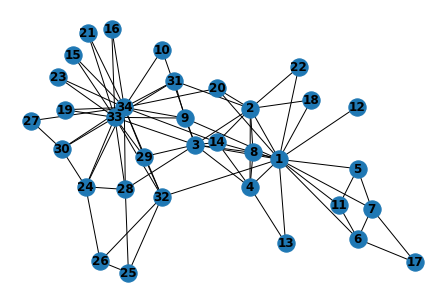

In [22]:
# Visualization of undirected unweighted graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

**2. Run the Girvan-Newman algorithm (using function girvan newman in NetworkX) and obtain the whole hierarchical clustering structure.**

In [23]:
import itertools
from networkx.algorithms import community

In [24]:
k = 34
part_no = 1

In [25]:
# Print out all possible partitions
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print("Partition",part_no,":",part_no+1,"clusters:", tuple(sorted(c) for c in communities), "\n")  
    part_no += 1

Partition 1 : 2 clusters: ([1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22], [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]) 

Partition 2 : 3 clusters: ([1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [10]) 

Partition 3 : 4 clusters: ([1, 2, 4, 8, 12, 13, 14, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [5, 6, 7, 11, 17], [10]) 

Partition 4 : 5 clusters: ([1, 2, 4, 8, 12, 13, 14, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34], [5, 6, 7, 11, 17], [10], [27]) 

Partition 5 : 6 clusters: ([1, 2, 4, 8, 12, 13, 14, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 28, 29, 30, 31, 33, 34], [5, 6, 7, 11, 17], [10], [25, 26, 32], [27]) 

Partition 6 : 7 clusters: ([1, 2, 4, 8, 13, 14, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 28, 29, 30, 31, 33, 34], [5, 6, 7, 11, 17], [10], [12], [25, 26, 32], [27]) 

Partition 

# Modularity

**3. For each possible partition, compute its modularity by using the function modularity in NetworkX. Show your
modularity results as a curve**

In [26]:
import networkx.algorithms.community as nx_community

In [27]:
# list for storing modularity value
list_for_modularity_value= []
# append modularity of each partition to the mod_list
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    list_for_modularity_value.append(nx_community.modularity(G, (tuple(sorted(c) for c in communities))))

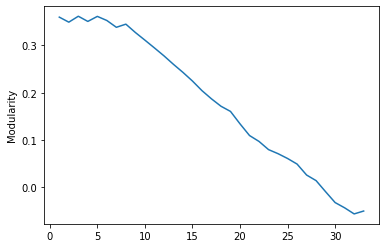

In [28]:
# plot the curve of modularity result
plt.ylabel("Modularity")
plt.plot(range(1,k), list_for_modularity_value)

**4. From the modularity plot, find the best partition according to the modularity measure. Show the corresponding
graph partitioning, with different colors for different clusters.**

In [29]:
# the highest modularity value
max_modularity_value = max(list_for_modularity_value)
max_modularity_value

0.36156250000000034

In [30]:
# find the partition of the highest modularity and store it as variable best_partition
list_for_modularity_value.index(max(list_for_modularity_value))
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    if(nx_community.modularity(G, (tuple(sorted(c) for c in communities))) == max_modularity_value):
        best_partition = tuple(sorted(c) for c in communities)

In [31]:
# Store the four partitions
c1 = best_partition[0]
c2 = best_partition[1]
c3 = best_partition[2]
c4 = best_partition[3]

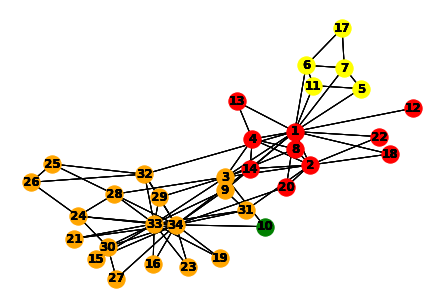

In [32]:
# Visualization of the best partition with the highest modularity
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, nodelist = c1, node_color = 'red', with_labels = True, font_weight = 'bold')
nx.draw(G, pos=pos, nodelist = c2, node_color = 'orange', with_labels = True, font_weight = 'bold')
nx.draw(G, pos=pos, nodelist = c3, node_color = 'yellow', with_labels = True, font_weight = 'bold')
nx.draw(G, pos=pos, nodelist = c4, node_color = 'green', with_labels = True, font_weight = 'bold')

In [33]:
# the best partition with the highest modularity
print("Best partition with the highest modularity is ",best_partition)

Best partition with the highest modularity is  ([1, 2, 4, 8, 12, 13, 14, 18, 20, 22], [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [5, 6, 7, 11, 17], [10])
